In [1]:
from Char2Vec.chars2vec import model
import pandas as pd
import numpy as np
import torch
from utils import clases, clean
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import random
import seaborn as sns
import matplotlib.pyplot as plt

2021-09-24 16:19:13.530502: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-24 16:19:13.530518: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Your CPU supports instructions that this binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2
For maximum performance, you can install NMSLIB from sources 
pip install --no-binary :all: nmslib


In [2]:
FOR_CHANGE = [str(i) for i in range(10)]
FOR_CHANGE += [chr(i) for i in range(ord('a'),ord('z'),1)]+['']

In [3]:
def random_change(good_word):
    rand_letter = np.random.randint(len(FOR_CHANGE))
    rand2change = np.random.randint(len(good_word))
    return good_word.replace(good_word[rand2change], FOR_CHANGE[rand_letter], 1)

In [4]:
documentos = clases.Documento.read_csv('dataset/fraude_TEXTO_TODOS.csv')
len(documentos)

4485

In [5]:
cv = CountVectorizer(analyzer='word',stop_words=clean.stops, min_df=.05, lowercase=True)

cv.fit([clean.general(doc.texto) for doc in documentos])

vocab = cv.vocabulary_

vocab_big = dict(filter(lambda x: len(x[0])>3, vocab.items()))
len(vocab_big)

6749

In [6]:
dirty_words = [random_change(word) for word in vocab_big]
dirty_words2 = [random_change(word) for word in vocab_big]
clean_words = list(vocab_big.keys())
not_similar_words = random.sample(clean_words, len(clean_words)) 
not_similar_words2 = random.sample(clean_words, len(clean_words)) 
LONG = len(clean_words)

In [7]:
df = pd.DataFrame({
    'true_words':clean_words*4, 
    'mispeled_words':dirty_words+dirty_words2+not_similar_words+not_similar_words2,
    'target':[1 for i in range(LONG*2)]+[0 for i in range(LONG*2)]
}).drop_duplicates()

In [8]:
all_letters = ''.join(['#']+[chr(i) for i in range(ord('a'),ord('z'))] + [str(i) for i in range(10)]+[''])
char2index = {k:v for v,k in enumerate(all_letters)}

In [9]:
words = []
for word in zip(df['true_words'],df['mispeled_words']):
    words.append(word)    

train_words, test_words, train_target, test_target = train_test_split(words, df['target'], test_size=0.2)


In [10]:
# model1 = model.Chars2Vec(150,char_to_ix=char2index )
model2 = model.Chars2Vec(char_to_ix=char2index,emb_dim=len(all_letters) )
print(model2.model.summary())
config = {
    'max_epochs':10,
    'patience':2,
    'batch_size':32,
    'validation_split':0.2}

model2.fit(train_words, train_target, **config)

2021-09-24 16:20:20.779998: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-24 16:20:20.780021: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-24 16:20:20.780075: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (legalhub): /proc/driver/nvidia/version does not exist
2021-09-24 16:20:20.780274: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, 36)]   0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, None, 36)]   0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 36)           21024       input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
subtract (Subtract)             (None, 36)           0           model[0][0]                

2021-09-24 16:20:22.114569: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 52157952 exceeds 10% of free system memory.
2021-09-24 16:20:22.133112: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 52157952 exceeds 10% of free system memory.
2021-09-24 16:20:22.171016: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
539/539 [==============================] - 8s 10ms/step - loss: 0.4095 - val_loss: 0.3231
Epoch 2/10
539/539 [==============================] - 5s 8ms/step - loss: 0.2800 - val_loss: 0.2464
Epoch 3/10
539/539 [==============================] - 5s 9ms/step - loss: 0.2167 - val_loss: 0.1962
Epoch 4/10
539/539 [==============================] - 5s 9ms/step - loss: 0.1680 - val_loss: 0.1598
Epoch 5/10
539/539 [==============================] - 5s 9ms/step - loss: 0.1335 - val_loss: 0.1220
Epoch 6/10
539/539 [==============================] - 6s 11ms/step - loss: 0.1056 - val_loss: 0.0979
Epoch 7/10
539/539 [==============================] - 6s 10ms/step - loss: 0.0847 - val_loss: 0.0808
Epoch 8/10
539/539 [==============================] - 5s 9ms/step - loss: 0.0691 - val_loss: 0.0671
Epoch 9/10
539/539 [==============================] - 5s 9ms/step - loss: 0.0566 - val_loss: 0.0591
Epoch 10/10
539/539 [==============================] - 5s 9ms/step - loss: 0.0473 - val_loss: 0.0

In [13]:
def tester(model_trained, test):
    """Función que recibe el modelo y los pares de palabra 

    Args:
        model (Char2Vec model): modelo entrenado con tensorflow
        test (list[tuple]): lista de pares de palabras a analizar

    Returns:
        list[int]: 1 si las palabras son lo mismo y 2 sino
    """    
    test_indexes = model_trained.get_word_indexes(test)
    pred = model_trained.model.predict(test_indexes)
    pred = [1 if i>0.5 else 0 for i in pred]
    return pred

def predict_proba(model_trained, test):
    """Función que hace lo mismo que el tester pero devuelve la probabilidad
    de que las 2 palabras sean la misma

    Args:
        model_trained (Char2Vec): modelo Char2Vec entrenado
        test (list[tuple]): lista de pares de palabras

    Returns:
        list[list[float]]: probabilidades de los distintos pares
    """    
    test_indexes = model_trained.get_word_indexes(test)
    pred = model_trained.model.predict(test_indexes)
    return pred

In [14]:
pred = model2.tester(test_words)#.8936
print(classification_report(test_target, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2689
           1       0.99      1.00      0.99      2701

    accuracy                           0.99      5390
   macro avg       0.99      0.99      0.99      5390
weighted avg       0.99      0.99      0.99      5390



In [ ]:
#               precision    recall  f1-score   support

#            0       1.00      0.99      0.99      2742
#            1       0.99      1.00      0.99      2671

#     accuracy                           0.99      5413
#    macro avg       0.99      0.99      0.99      5413
# weighted avg       0.99      0.99      0.99      5413

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2742
           1       0.99      1.00      0.99      2671

    accuracy                           0.99      5413
   macro avg       0.99      0.99      0.99      5413
weighted avg       0.99      0.99      0.99      5413



<AxesSubplot:>

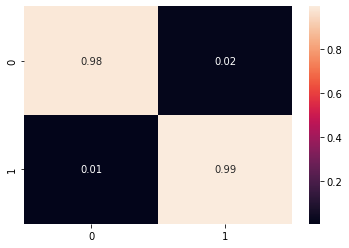

In [ ]:
sns.heatmap(confusion_matrix(test_target, pred, normalize='true'), fmt='.2f', annot=True)

In [15]:
result = pd.DataFrame({'words': test_words, 'target':test_target, 'pred':pred})

In [16]:
result[result['target'] != result['pred']]

,words,target,pred
14437,"(pericias, persigue)",0,1
24289,"(sufrimiento, vertiginoso)",0,1
24869,"(quedando, adecuados)",0,1
22828,"(masa, juana)",0,1
5739,"(coloca, cloca)",1,0
20476,"(cpcc, tome)",0,1
26803,"(contradictorio, psicosomatica)",0,1
14276,"(victima, exacta)",0,1
19869,"(problematica, experiencia)",0,1
20636,"(deja, arts)",0,1


In [19]:
model2.save_model('autocorrector')


Weights saved successfully 


In [ ]:
vectores = model2.vectorize([i[0] for i in test_words]+[i[1] for i in test_words])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(vectores)

PCA(n_components=2)

In [ ]:
vectores_2d = pca.transform(vectores)

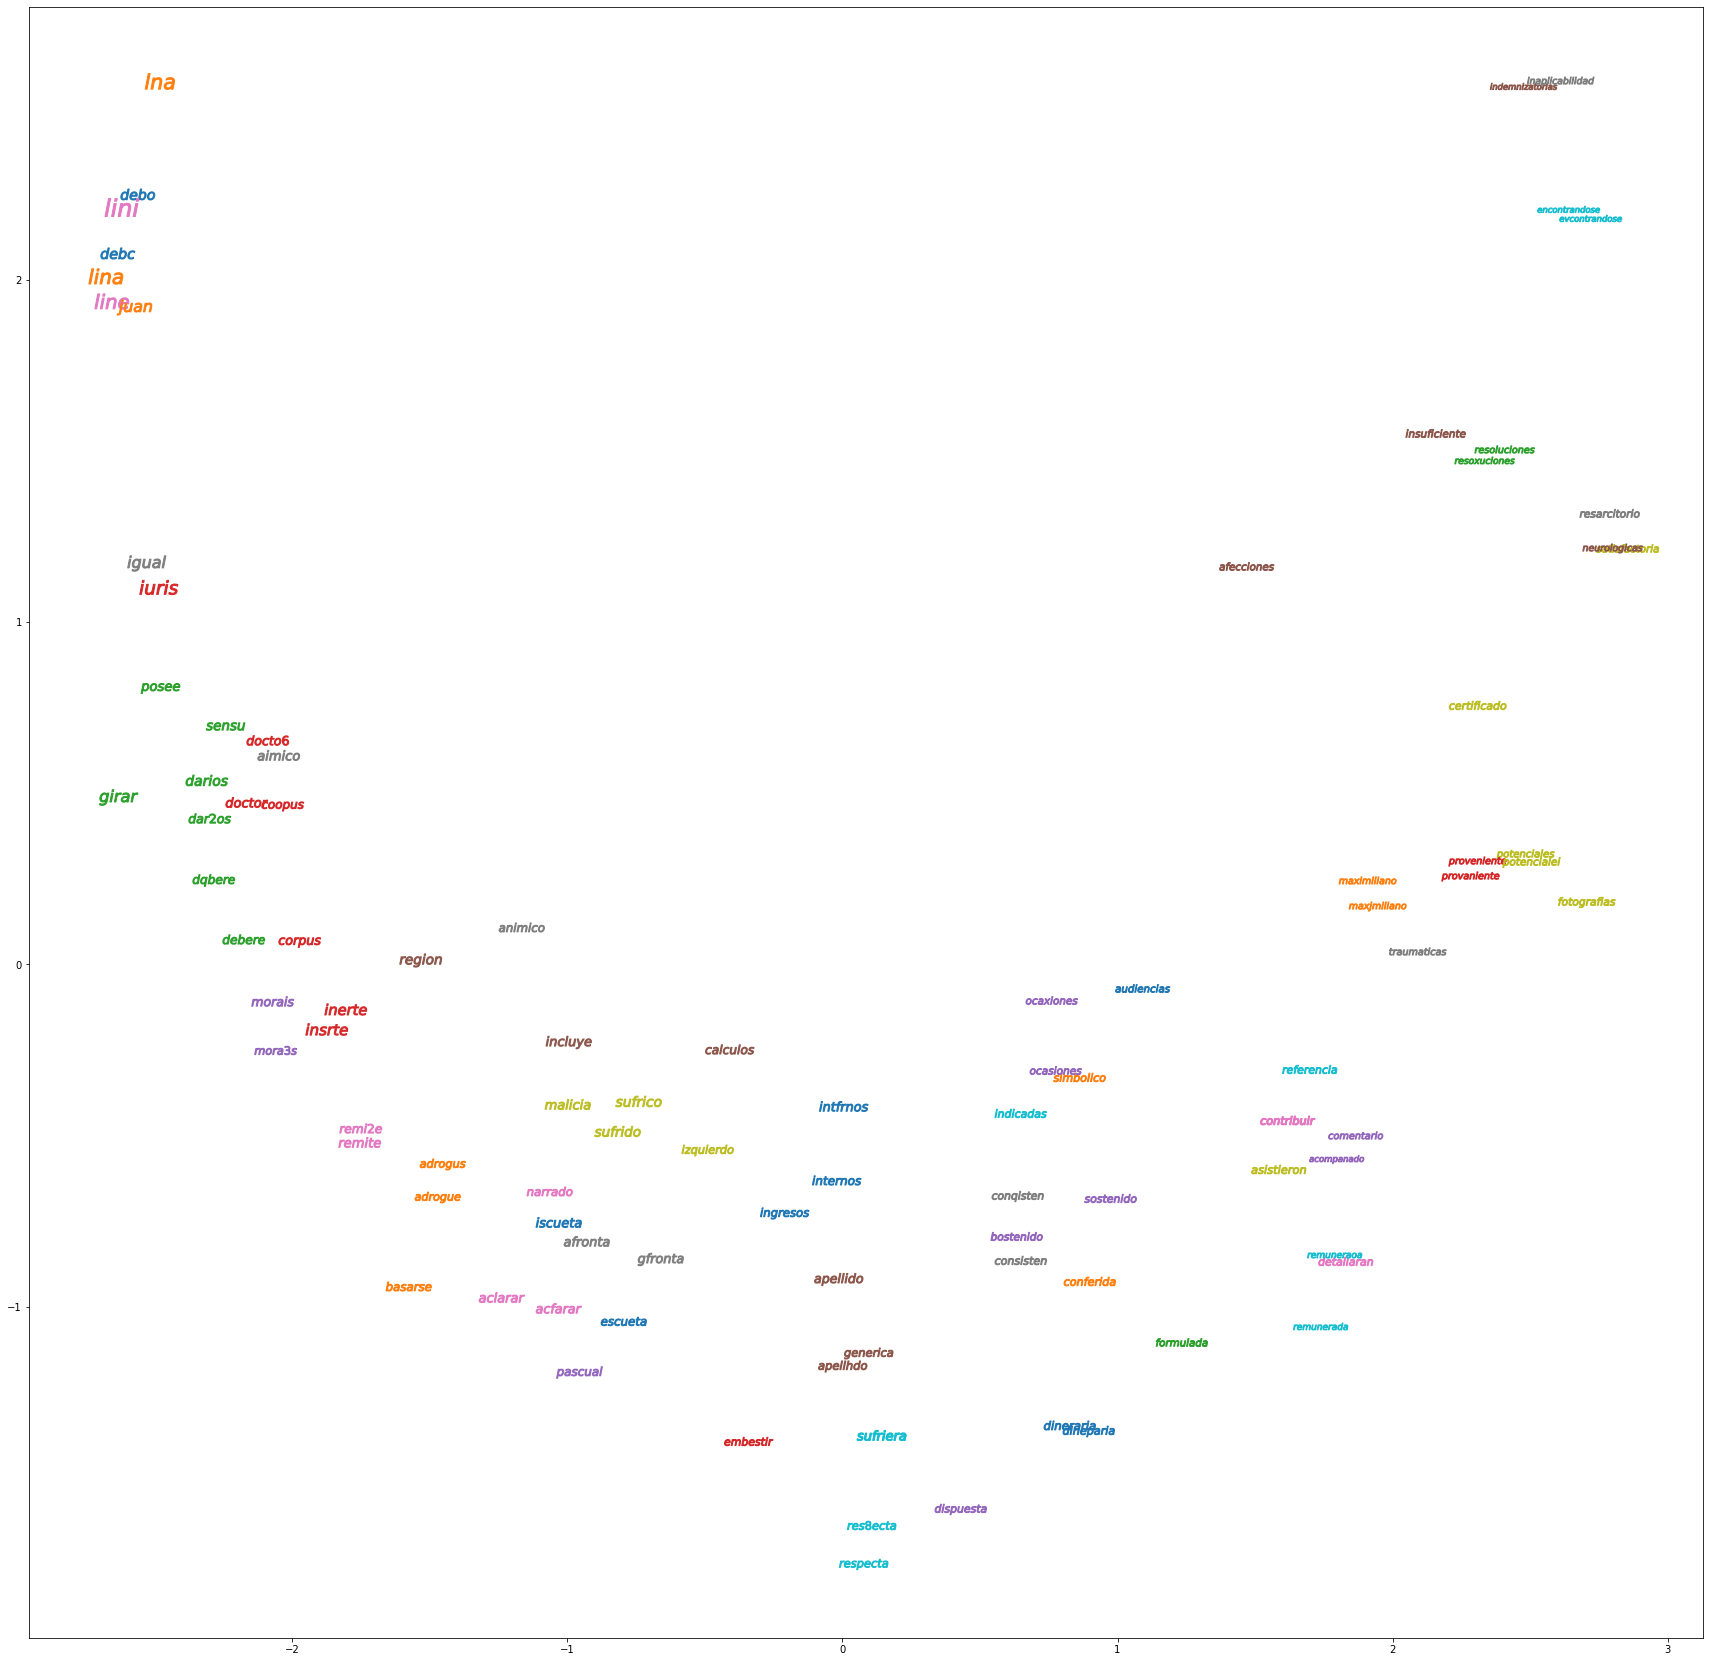

In [ ]:
f = plt.figure(figsize=(30, 30))
words = [i[0] for i in test_words]+[i[1] for i in test_words]
top = 50
for j in range(len(vectores_2d[:top])):
    plt.scatter(vectores_2d[j, 0], vectores_2d[j, 1],
                marker=('$' + words[j] + '$'),
                s=300 * len(words[j]), label=j,)
for j in range(len(test_words),len(test_words)+top):
    plt.scatter(vectores_2d[j, 0], vectores_2d[j, 1],
                marker=('$' + words[j] + '$'),
                s=300 * len(words[j]), label=j,)
plt.show()
